In [1]:
import os
import sys
sys.path.append("..")

In [2]:
aveta_data_path = "/home/ys/aveta-data"

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imread, imsave, imresize
%matplotlib inline

In [4]:
def read_speedfile(path=None):
    if path is None:
        path = aveta_data_path
    speedfile = os.path.join(path, "speeds.txt")
    ret = {}
    with open(speedfile) as fp:
        for line in fp:
            filename, l, r, l_, r_ = line.strip().split(",")
            ret[filename] = [os.path.join(path, filename), float(l), float(r), float(l_), float(r_)]
    return ret

In [5]:
speeds = read_speedfile()

We take a look at a few random images and the left and right speeds before and after the frame

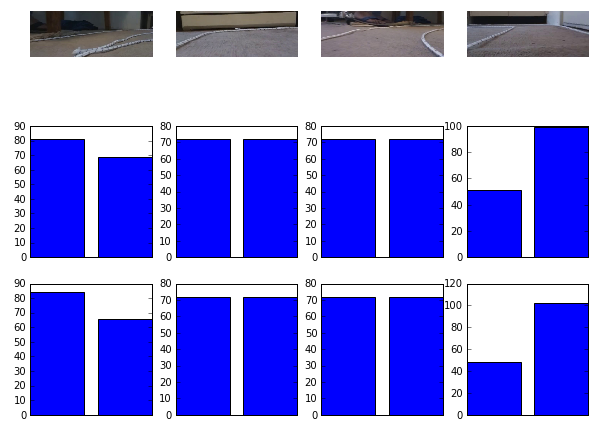

In [18]:
n_imgs = 4
imfiles = [np.random.choice(speeds.keys()) for _ in range(n_imgs)]
fig = plt.figure(figsize=(10, 8))
for i, imfile in enumerate(imfiles):
    impath, lt_speed, rt_speed, lt_speed_aft, rt_speed_aft = speeds[imfile]
    img = imread(impath, mode="RGB")
    ax = fig.add_subplot(3, n_imgs, i+1)
    ax.set_axis_off()
    ax.imshow(img)
    
    ax = fig.add_subplot(3, n_imgs, i+1+n_imgs)
    ax.bar([0, 1], [lt_speed, rt_speed])
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.xaxis.set_ticks([])
    
    ax = fig.add_subplot(3, n_imgs, i+1+2*n_imgs)
    ax.bar([0, 1], [lt_speed_aft, rt_speed_aft])
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.xaxis.set_ticks([])
    
fig.show()
    